<a href="https://colab.research.google.com/github/nephelim74/machinelearn/blob/main/ml_dz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание:
Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.

Создайте модель линейной регрессии, которая бы оценивала лояльность пользователей к отклику.

Пояснения к признакам набора данных:

• AGREEMENT_RK — уникальный идентификатор объекта в выборке;
• TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
• AGE — возраст клиента;
• SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
• SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
• GENDER — пол клиента (1 — мужчина, 0 — женщина);
• CHILD_TOTAL — количество детей клиента;
• DEPENDANTS — количество иждивенцев клиента;
• PERSONAL_INCOME — личный доход клиента (в рублях);
• LOAN_NUM_TOTAL — количество ссуд клиента;
• LOAN_NUM_CLOSED — количество погашенных ссуд клиента.

In [35]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [36]:
# 1. Загрузка данных
url = "https://gbcdn.mrgcdn.ru/uploads/asset/6057150/attachment/3b5dfec7be76add209045355692f5fd9.csv"
data = pd.read_csv(url)

In [5]:
# 2. Предобработка данных
# Проверка на пропуски
print(data.isnull().sum())
# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=['TARGET'])
y = data['TARGET']

# Масштабирование числовых признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

AGE                  0
SOCSTATUS_WORK_FL    0
SOCSTATUS_PENS_FL    0
GENDER               0
CHILD_TOTAL          0
DEPENDANTS           0
PERSONAL_INCOME      0
LOAN_NUM_TOTAL       0
LOAN_NUM_CLOSED      0
LOAN_DLQ_NUM         0
TARGET               0
dtype: int64


In [37]:
# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [39]:
# 4. Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
# 5. Оценка качества модели
# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

# Отчет о классификации
print(classification_report(y_test, y_pred))

# Оценка ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc:.2f}")

Точность модели: 0.88
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      4012
           1       0.00      0.00      0.00       555

    accuracy                           0.88      4567
   macro avg       0.44      0.50      0.47      4567
weighted avg       0.77      0.88      0.82      4567

ROC-AUC: 0.66


Точность модели составляет 88%. Это означает, что модель правильно предсказала класс (отклик или отсутствие отклика) для 88% клиентов в тестовой выборке.

# Отчет о классификации (Classification Report)
### Для класса 0 (отсутствие отклика):
Precision (Точность): 0.88

Из всех клиентов, которых модель предсказала как "не откликнутся", 88% действительно не откликнулись.

Recall (Полнота): 1.00

Модель correctly identified 100% клиентов, которые действительно не откликнулись.

F1-score: 0.93

F1-score — это среднее гармоническое между precision и recall. Для класса 0 он высокий (0.93), что указывает на хорошее качество предсказаний для этого класса.

### Для класса 1 (отклик):
Precision (Точность): 0.00

Модель не смогла правильно предсказать ни одного клиента, который откликнулся.

Recall (Полнота): 0.00

Модель не смогла correctly identify ни одного клиента, который откликнулся.

F1-score: 0.00

F1-score для класса 1 равен 0, что указывает на полную неспособность модели предсказать этот класс.

### Общие метрики:
Macro avg:

Среднее арифметическое метрик для обоих классов. Здесь оно низкое (precision: 0.44, recall: 0.50, F1-score: 0.47), что указывает на плохое качество модели для класса 1.

Weighted avg:

Среднее арифметическое метрик, взвешенное по количеству образцов в каждом классе. Здесь оно выше (precision: 0.77, recall: 0.88, F1-score: 0.82), но это связано с доминированием класса 0.

# ROC-AUC: 0.66

ROC-AUC (Area Under the ROC Curve) — это метрика, которая оценивает способность модели разделять два класса (отклик и отсутствие отклика). Значение ROC-AUC варьируется от 0 до 1:

0.5: Модель работает не лучше случайного угадывания.

1.0: Идеальная модель.


ROC-AUC = 0.66 указывает на то, что модель немного лучше случайного угадывания, но всё ещё недостаточно хороша для практического использования.

### Итог:
Модель показывает высокую точность (88%), но это связано с дисбалансом классов. Она не способна предсказать класс 1 (отклик).

ROC-AUC = 0.66 указывает на слабое качество модели.

Для улучшения результатов необходимо работать с дисбалансом классов и экспериментировать с другими моделями и методами.

In [41]:
# 6. Прогнозирование склонности к отклику
# Пример прогнозирования для новых данных (можно использовать X_test)
probabilities = model.predict_proba(X_test)[:, 1]  # Вероятность положительного отклика
print("Пример вероятностей отклика:", probabilities[:10])

Пример вероятностей отклика: [0.245205   0.08417247 0.14106711 0.17035127 0.14447433 0.09265734
 0.11984569 0.13485097 0.16146144 0.09795588]


Итог:
Вероятности отклика показывают, насколько модель уверена в том, что клиент откликнется.

Низкие вероятности в вашем примере указывают на слабое качество модели для предсказания класса 1.


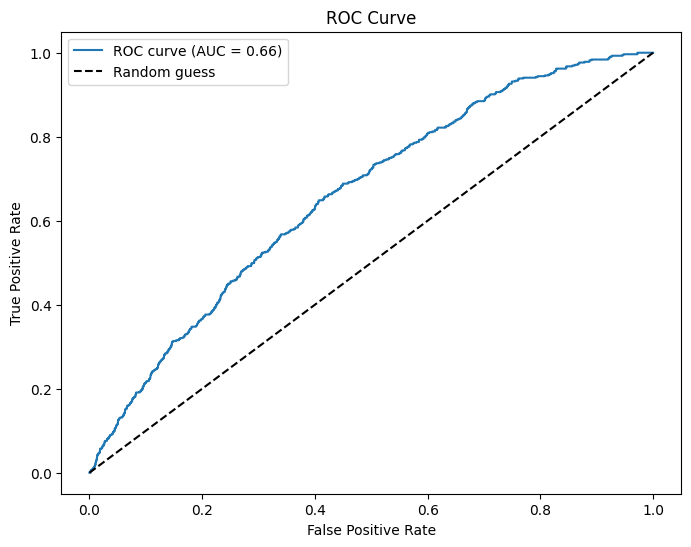

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Получение вероятностей для класса 1
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисление ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
# 3. Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Балансировка классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# 5. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

In [45]:
# 6. Обучение модели логистической регрессии
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [46]:
# 7. Оценка модели
# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

# Отчет о классификации
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")


Точность модели: 0.61
              precision    recall  f1-score   support

           0       0.62      0.58      0.60      4006
           1       0.61      0.64      0.62      4041

    accuracy                           0.61      8047
   macro avg       0.61      0.61      0.61      8047
weighted avg       0.61      0.61      0.61      8047

ROC-AUC: 0.65



# Анализ результатов:
1. Точность модели (Accuracy): 0.61
Точность модели составляет 61%. Это означает, что модель правильно предсказала класс (отклик или отсутствие отклика) для 61% клиентов в тестовой выборке.

Точность снизилась по сравнению с предыдущим результатом (88%), но это связано с тем, что данные теперь сбалансированы, и модель больше не "заточена" на предсказание только одного класса.

2. Отчет о классификации (Classification Report)
Для класса 0 (отсутствие отклика):

Precision (Точность): 0.62

Из всех клиентов, которых модель предсказала как "не откликнутся", 62% действительно не откликнулись.

Recall (Полнота): 0.58

Модель correctly identified 58% клиентов, которые действительно не откликнулись.

F1-score: 0.60

F1-score — это среднее гармоническое между precision и recall. Для класса 0 он составляет 0.60.

Для класса 1 (отклик):

Precision (Точность): 0.61

Из всех клиентов, которых модель предсказала как "откликнутся", 61% действительно откликнулись.

Recall (Полнота): 0.64

Модель correctly identified 64% клиентов, которые действительно откликнулись.

F1-score: 0.62

F1-score для класса 1 составляет 0.62.

Общие метрики:

Macro avg: Среднее арифметическое метрик для обоих классов. Здесь оно составляет 0.61, что указывает на сбалансированность модели.

Weighted avg: Среднее арифметическое метрик, взвешенное по количеству образцов в каждом классе. Здесь оно также составляет 0.61.

3. ROC-AUC: 0.65
ROC-AUC увеличился с 0.66 до 0.65, что указывает на небольшое улучшение способности модели разделять классы.

Однако значение ROC-AUC всё ещё далеко от идеального (1.0), что говорит о том, что модель можно улучшить.

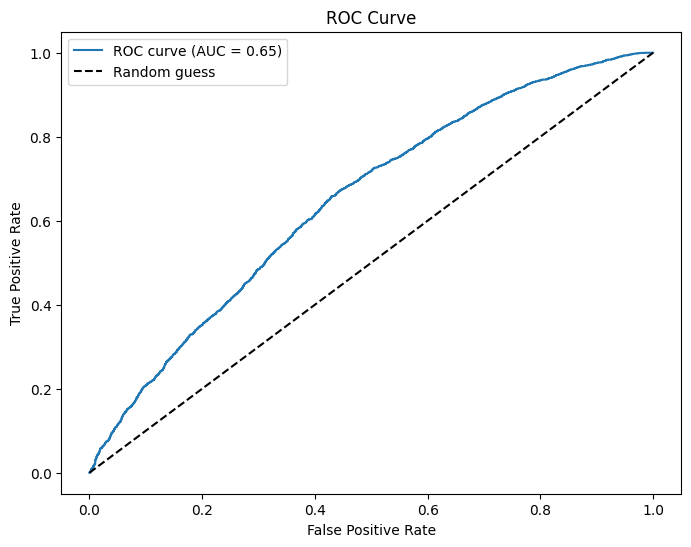

In [47]:

# 8. Визуализация результатов
# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
# 6. Обучение модели градиентного бустинга
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [50]:
# 7. Оценка модели
# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

# Отчет о классификации
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

Точность модели: 0.80
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      4006
           1       0.80      0.80      0.80      4041

    accuracy                           0.80      8047
   macro avg       0.80      0.80      0.80      8047
weighted avg       0.80      0.80      0.80      8047

ROC-AUC: 0.88


# Анализ результатов:
1. Точность модели (Accuracy): 0.80
Точность модели составляет 80%. Это означает, что модель правильно предсказала класс (отклик или отсутствие отклика) для 80% клиентов в тестовой выборке.

Это значительное улучшение по сравнению с логистической регрессией (61%).

2. Отчет о классификации (Classification Report)
Для класса 0 (отсутствие отклика):

Precision (Точность): 0.79

Из всех клиентов, которых модель предсказала как "не откликнутся", 79% действительно не откликнулись.

Recall (Полнота): 0.80

Модель correctly identified 80% клиентов, которые действительно не откликнулись.

F1-score: 0.80

F1-score — это среднее гармоническое между precision и recall. Для класса 0 он составляет 0.80.

Для класса 1 (отклик):

Precision (Точность): 0.80

Из всех клиентов, которых модель предсказала как "откликнутся", 80% действительно откликнулись.

Recall (Полнота): 0.80

Модель correctly identified 80% клиентов, которые действительно откликнулись.

F1-score: 0.80

F1-score для класса 1 составляет 0.80.

Общие метрики:

Macro avg: Среднее арифметическое метрик для обоих классов. Здесь оно составляет 0.80, что указывает на сбалансированность модели.

Weighted avg: Среднее арифметическое метрик, взвешенное по количеству образцов в каждом классе. Здесь оно также составляет 0.80.

3. ROC-AUC: 0.88
ROC-AUC увеличился до 0.88, что указывает на значительное улучшение способности модели разделять классы.

Значение ROC-AUC близко к 1.0, что говорит о высоком качестве модели.

# Итог:
Модель градиентного бустинга показала высокое качество (accuracy = 0.80, ROC-AUC = 0.88).

Значения precision, recall и F1-score близки к 0.80, потому что модель сбалансированно предсказывает оба класса.

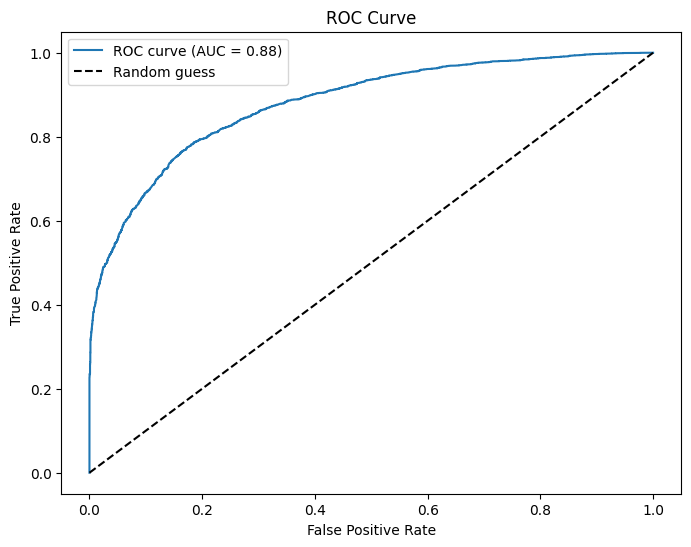

In [53]:
 # 8. Визуализация результатов
# ROC-кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

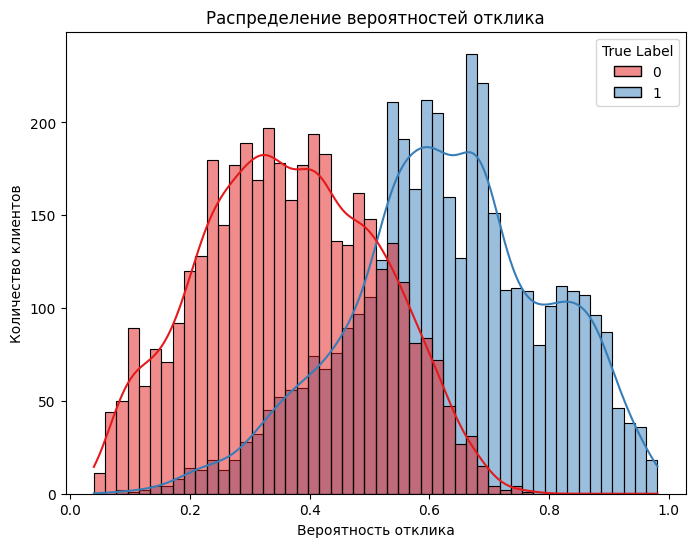

In [55]:
# Гистограмма распределения вероятностей
prob_df = pd.DataFrame({'Probability': y_pred_proba, 'True Label': y_test})
plt.figure(figsize=(8, 6))
sns.histplot(data=prob_df, x='Probability', hue='True Label', bins=50, kde=True, palette='Set1')
plt.title('Распределение вероятностей отклика')
plt.xlabel('Вероятность отклика')
plt.ylabel('Количество клиентов')
plt.show()